In [1]:
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
df = pd.read_csv('../../../data/processed/tokenized_data.csv')
X_train, X_test, y_train, y_test = train_test_split(df['reviewText'], df['overall'], test_size=0.2, random_state=42)

X_train.fillna('', inplace=True)
X_test.fillna('', inplace=True)

# Initialize and fit the CountVectorizer to transform text data into bag-of-words vectors
vectorizer = CountVectorizer()

X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [5]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_bow, y_train)

c:\Users\emine\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [9]:
y_pred = lr_model.predict(X_test_bow)

In [10]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.60      0.77      0.67     20917
         2.0       0.35      0.10      0.16     12765
         3.0       0.41      0.31      0.35     19019
         4.0       0.48      0.26      0.34     28682
         5.0       0.76      0.93      0.84     88965

    accuracy                           0.67    170348
   macro avg       0.52      0.47      0.47    170348
weighted avg       0.62      0.67      0.63    170348



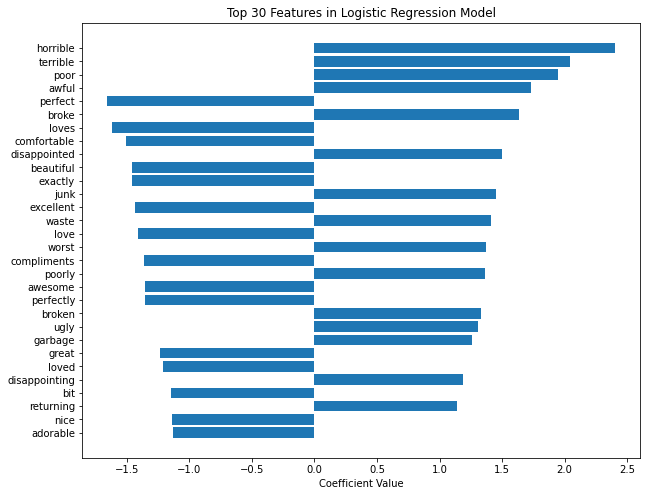

In [11]:
# Get the feature names
feature_names = vectorizer.get_feature_names()

# Get the coefficients from the logistic regression model
coefs = lr_model.coef_[0]

# Create a list of (feature_name, coefficient) tuples
features_importances = zip(feature_names, coefs)

# Sort the features by the absolute value of their coefficient
sorted_features = sorted(features_importances, key=lambda x: -abs(x[1]))

# Select the top 30 features
top_features = sorted_features[:30]

# Separate the feature names and their coefficients
top_feature_names, top_coefs = zip(*top_features)

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.barh(range(len(top_coefs)), top_coefs, align='center')
plt.yticks(range(len(top_coefs)), top_feature_names)
plt.xlabel('Coefficient Value')
plt.title('Top 30 Features in Logistic Regression Model')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest value on top
plt.show()

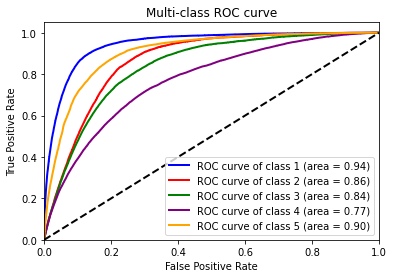

In [14]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output labels for multi-class ROC curve
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3, 4, 5])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1]

# Calculate dummies once
y_pred_proba = lr_model.predict_proba(X_test_bow)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()

colors = ['blue', 'red', 'green', 'purple', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i + 1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curve')
plt.legend(loc="lower right")
plt.show()